R code for the method described in _On obtaining daily climatological values from monthly means_ (Epstein, 1990).

In [1]:
# Sample monthly means
Y <- c(Jan=42, Feb=54, Mar=55, Apr=63, May=66, Jun=77, Jul=78, Aug=79, 
       Sep=75, Oct=68, Nov=55, Dec=44)
months <- 1:12

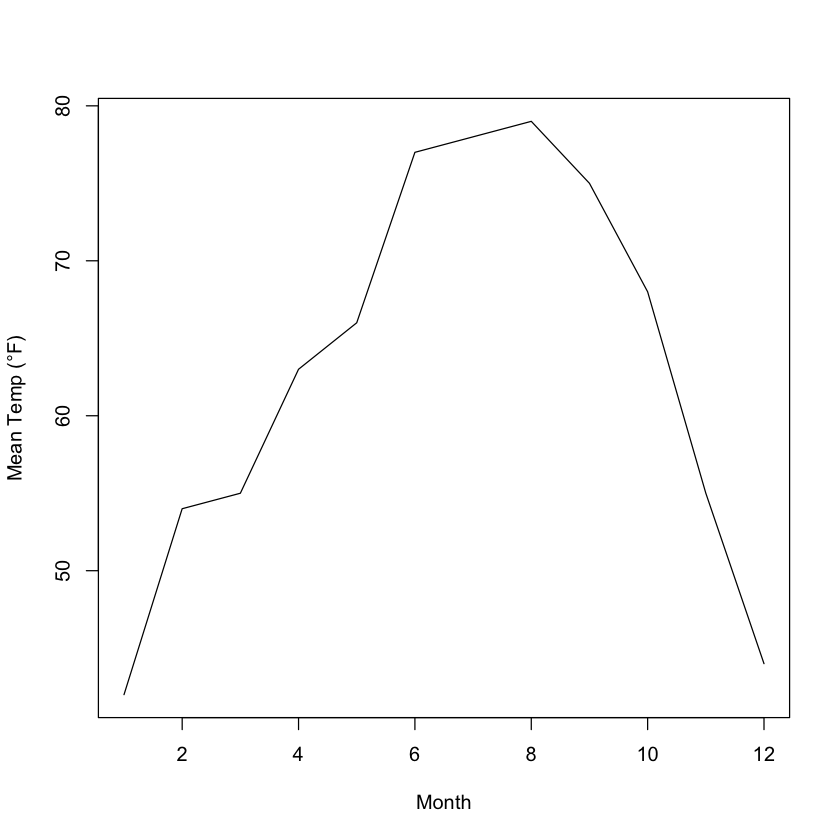

In [2]:
plot(Y ~ months, type='l', xlab='Month', ylab='Mean Temp (°F)')

In [3]:
get.a.nought <- function(Y) {
  sum(Y) / 12
}

In [4]:
get.a.j <- function(Y, j) {
  T <- 1:12
  ((pi*j/12) / sin(pi*j/12)) * sum(Y * cos(2*pi*j*T / 12) / 6)
}

In [5]:
get.b.j <- function(Y, j) {
  T <- 1:12
  ((pi*j/12) / sin(pi*j/12)) * sum(Y * sin(2*pi*j*T / 12) / 6)
}

In [6]:
get.a.6 <- function(Y) {
  T <- 1:12
  ((pi/2) / sin(pi/2)) * sum(Y * cos(pi*T) / 12)
}

In [7]:
a0 <- get.a.nought(Y)
A <- numeric(6)
B <- numeric(6)

for (j in c(1:6)) {
  A[j] <- get.a.j(Y, j)
  B[j] <- get.b.j(Y, j)
}

#A[6] <- get.a.6(Y)
#B[6] <- 0

a0
A
B

[1] 63

[1] -14.1111749  -3.5779250  -2.4065616  -0.3022999  -0.5187617   3.6651914

[1] -9.859030e+00  1.511499e-01 -9.256006e-01 -5.235988e-01 -1.472450e+00
[6] -9.329514e-14

In [8]:
interpolate.daily <- function(a0, A, B) {
  y <- numeric(365)
  i <- 1
  for (t in seq(1, 12, length=365)) {
    harmonic <- 0
    for (j in c(1:6)) {
      harmonic <- (harmonic 
                   + A[j] * cos(2*pi*j*t / 12) 
                   + B[j] * sin(2*pi*j*t / 12))
    }  
    y[i] <- a0 + harmonic
    i <- i + 1
  }
  y
}

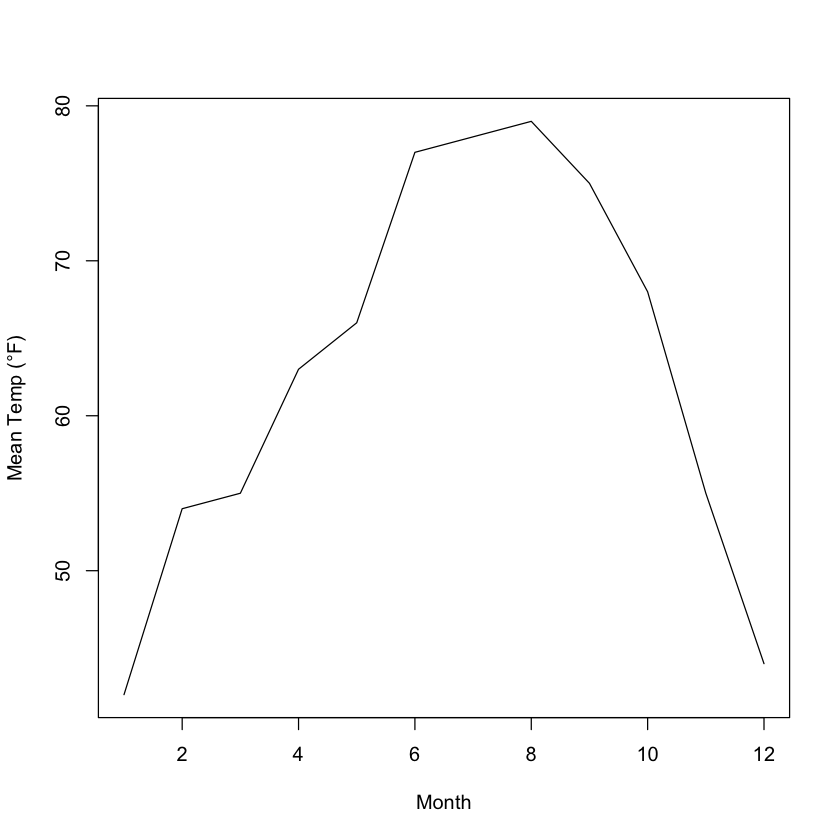

In [9]:
plot(Y ~ months, type='l', xlab='Month', ylab='Mean Temp (°F)')

In [10]:
(month.midpoints <- seq(15, 365-15, length=12))

[1]  15.00000  45.45455  75.90909 106.36364 136.81818 167.27273 197.72727
 [8] 228.18182 258.63636 289.09091 319.54545 350.00000

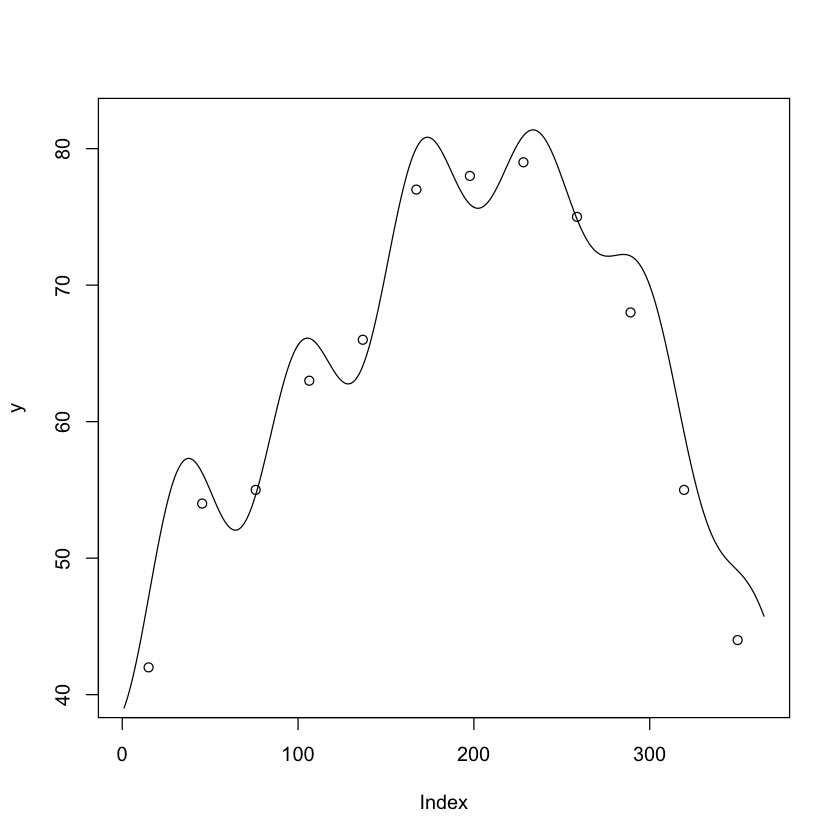

In [11]:
y <- interpolate.daily(a0, A, B)
plot(y, type='l', ylim=c(40, 82))
points(Y ~ month.midpoints)

In [12]:
get.daily.from.monthly <- function(monthly.means) {
  a0 <- get.a.nought(monthly.means)
  A <- numeric(6)
  B <- numeric(6)

  for (j in c(1:6)) {
    A[j] <- get.a.j(monthly.means, j)
    B[j] <- get.b.j(monthly.means, j)
  }  
  interpolate.daily(a0, A, B)
}

In [13]:
monthly.means <- c(Jan=27, Feb=40, Mar=45, Apr=58, May=66, Jun=77, Jul=83, 
                  Aug=92, Sep=79, Oct=68, Nov=47, Dec=32)
pseudo.daily <- get.daily.from.monthly(monthly.means)

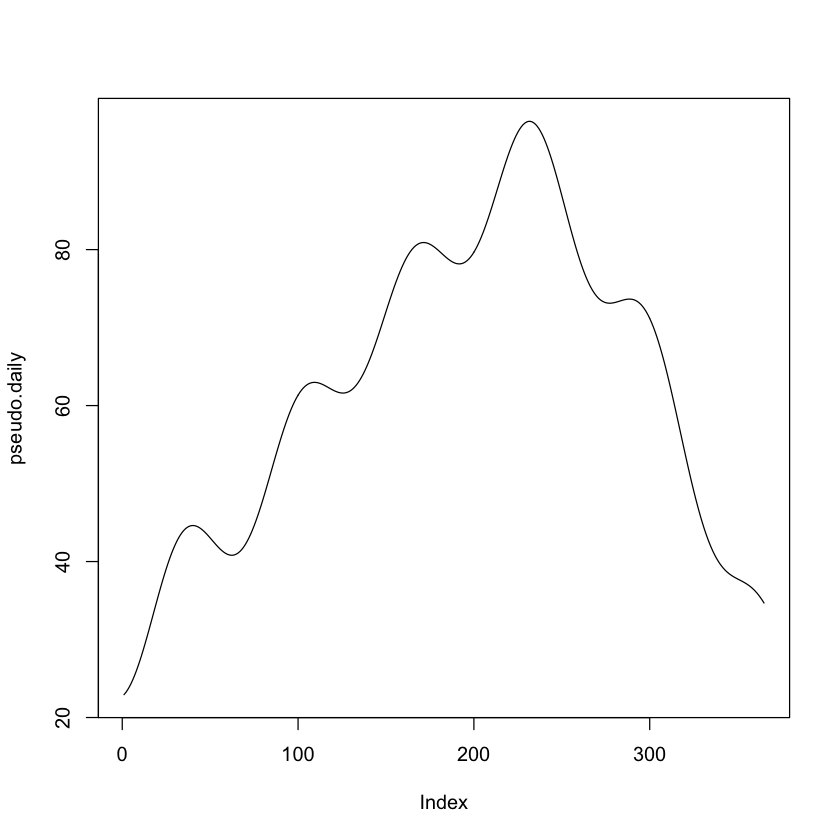

In [14]:
plot(pseudo.daily, type='l')